## **Data Preprocessing before building Machine Learning model**

### **Step1: Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Step2: Read dataset** 

In [19]:
df = sns.load_dataset('titanic')

In [38]:
# head
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
# tail
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### **Step3: Quick Data Audit**

In [40]:
# shape
df.shape

(891, 15)

In [41]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
# check missing values
df.isnull().sum()/df.shape[0]*100 # check % missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [43]:
# check duplicate values
df.duplicated().sum()

np.int64(107)

In [44]:
# identifying garbage values
for i in df.select_dtypes(include='object').columns:
    
    print(df[i].value_counts(dropna=False))
    print("UNIQUE VALUES:", df[i].unique())
    print('----'*10)

sex
male      577
female    314
Name: count, dtype: int64
UNIQUE VALUES: ['male' 'female']
----------------------------------------
embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64
UNIQUE VALUES: ['S' 'C' 'Q' nan]
----------------------------------------
who
man      537
woman    271
child     83
Name: count, dtype: int64
UNIQUE VALUES: ['man' 'woman' 'child']
----------------------------------------
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64
UNIQUE VALUES: ['Southampton' 'Cherbourg' 'Queenstown' nan]
----------------------------------------
alive
no     549
yes    342
Name: count, dtype: int64
UNIQUE VALUES: ['no' 'yes']
----------------------------------------


### **Step4: Exploratory Data Analysis**

In [45]:
# descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


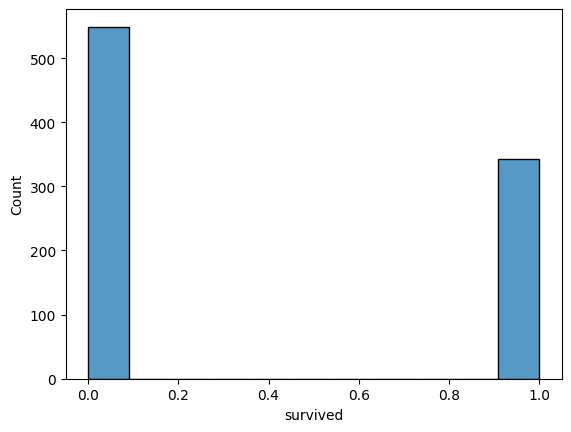

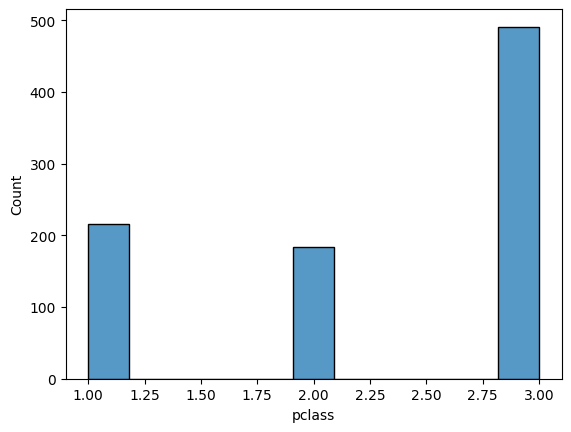

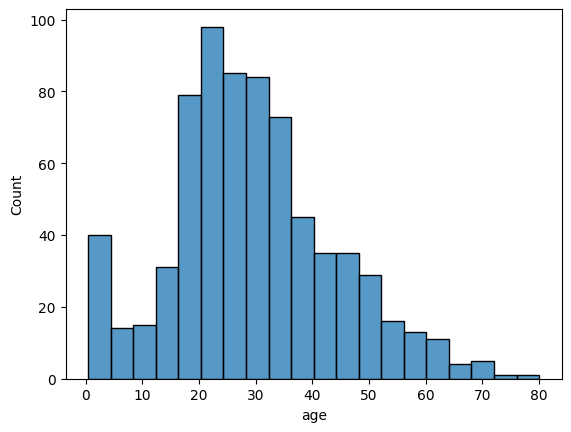

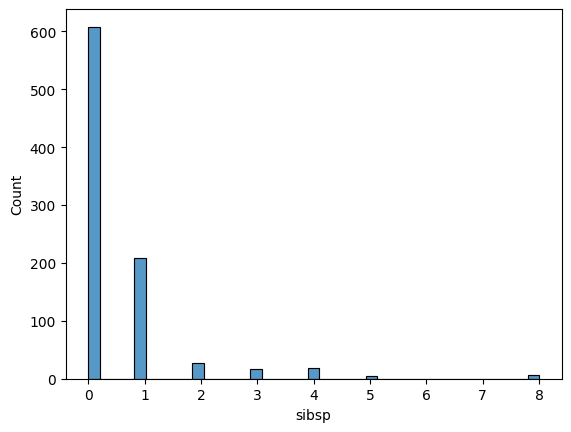

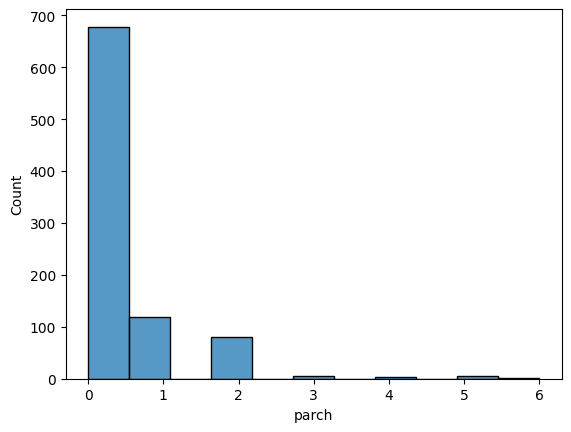

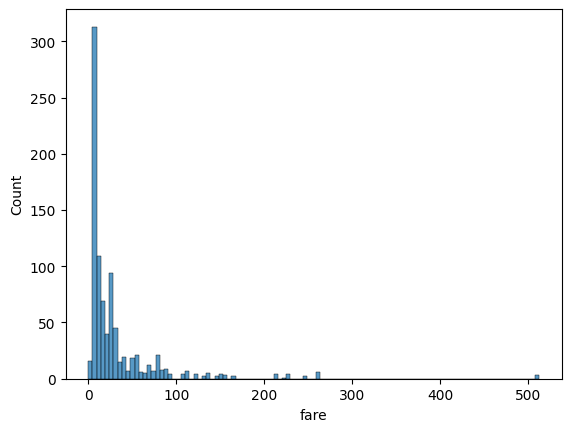

In [46]:
# histogram to unerstand the distribution
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()


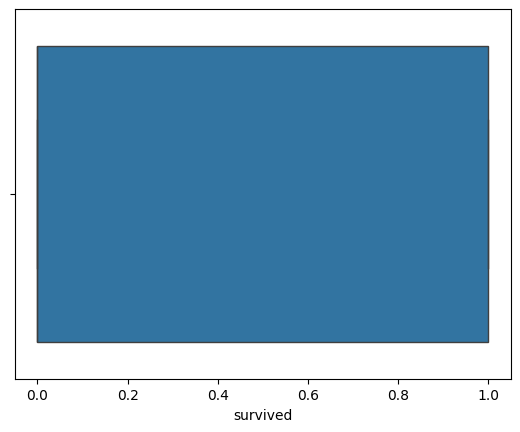

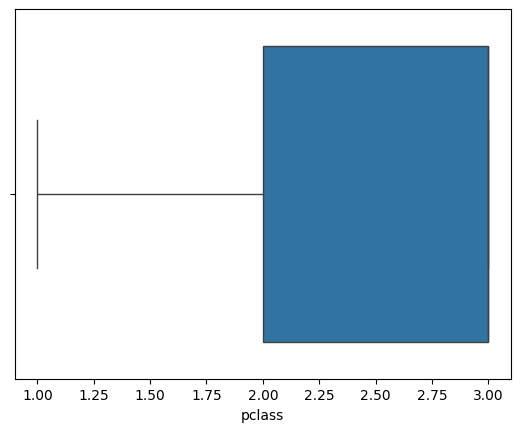

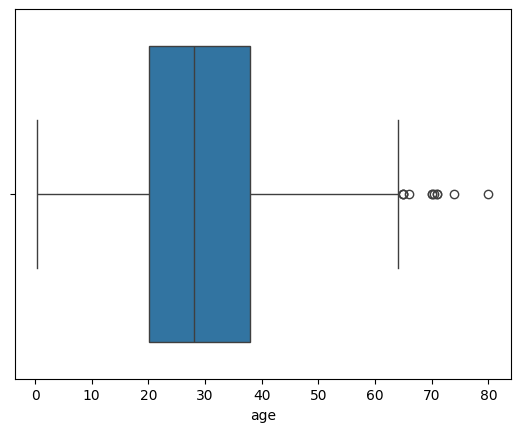

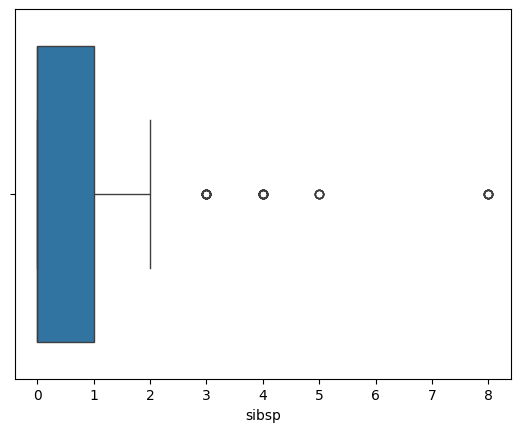

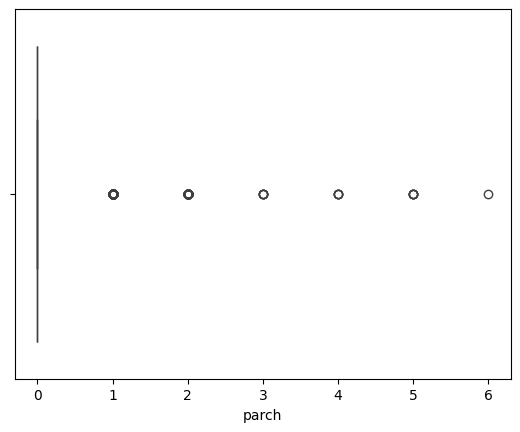

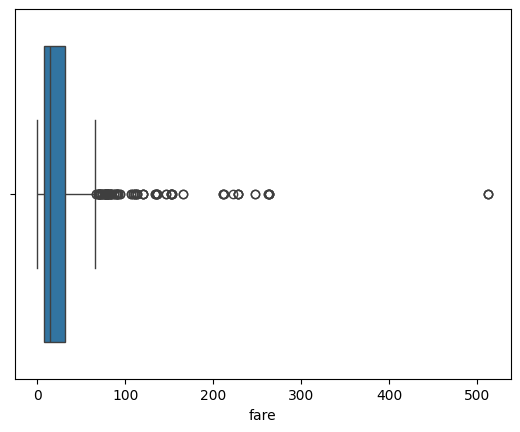

In [47]:
# boxplot to identifying the outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data = df,x = i)
    plt.show()

In [48]:
df.select_dtypes(include='number').columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

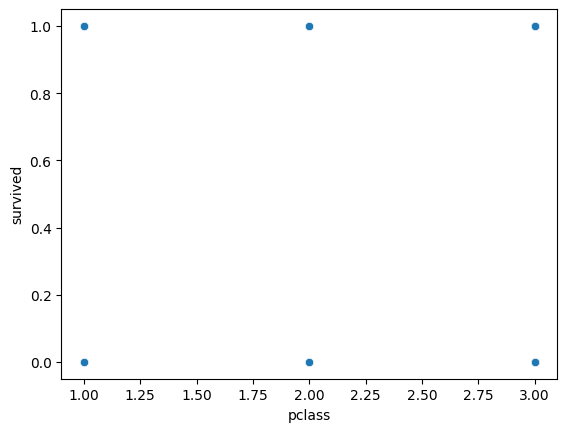

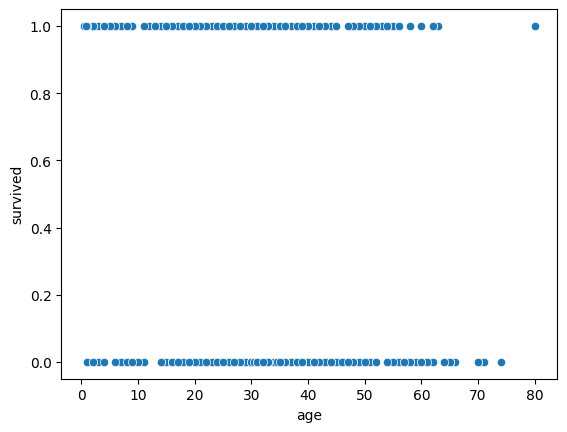

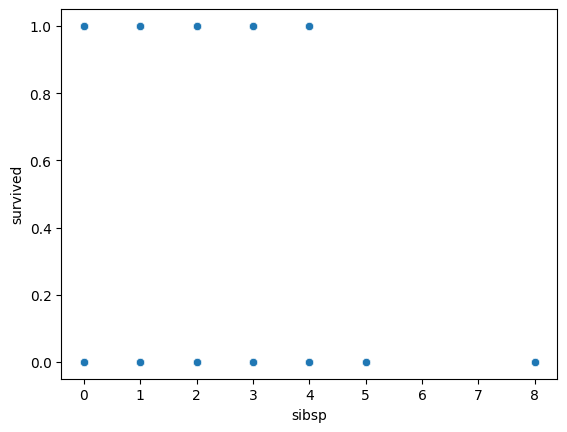

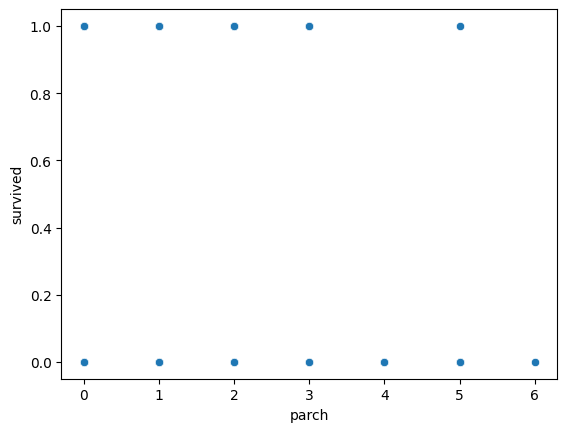

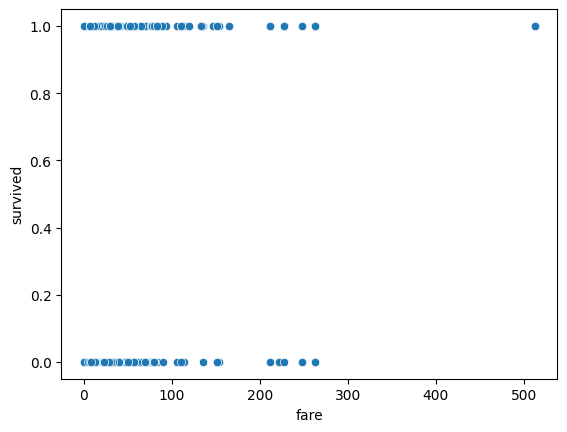

In [49]:
# scatterplot to understand the relationship
for i in ['pclass', 'age', 'sibsp', 'parch', 'fare']:
    sns.scatterplot(data = df , x=i, y = 'survived')
    plt.show()

In [50]:
# correlation with heatmap to interept the the relation and Multicollinearity 

In [51]:
s = df.select_dtypes(include='number').corr()
s

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

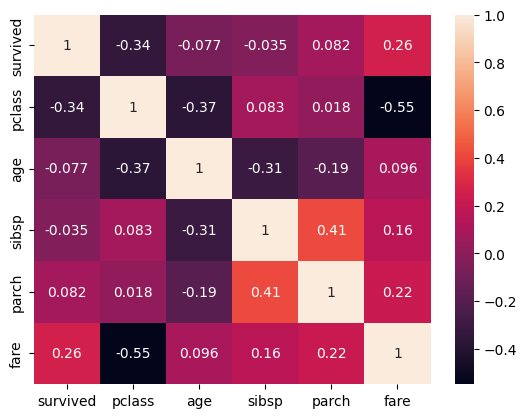

In [52]:
#plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

### **Step5: Handling Missing Data**

In [20]:
df.isnull().sum()/df.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [21]:
# drop embark_town column
df = df.drop('deck',axis=1)

In [22]:
# fill missing values
df['age'] = df['age'].fillna(df['age'].median())

In [23]:
for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\Computer\AppData\Local\Temp\ipykernel_8792\2459431018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### **Step6: Outliers Treatment**

In [25]:
def treat_out(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return lower,upper


In [26]:
df.select_dtypes(include='number').columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [27]:
for i in ['age', 'sibsp', 'parch', 'fare']:
    lower,upper = treat_out(df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])
    df[i] = np.where(df[i]>upper,upper,df[i])

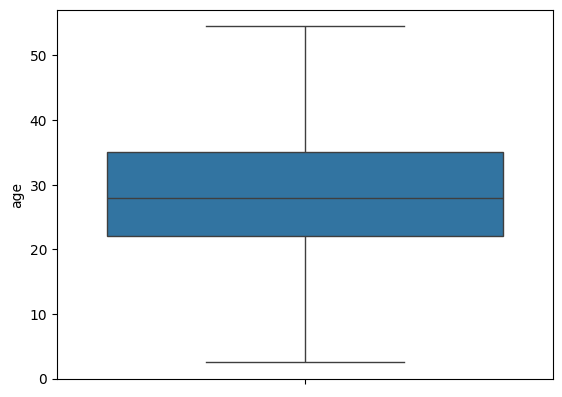

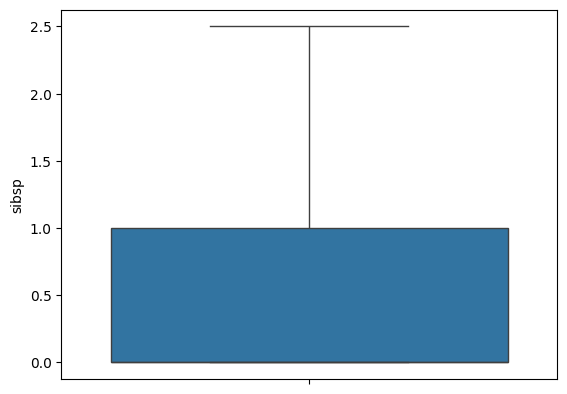

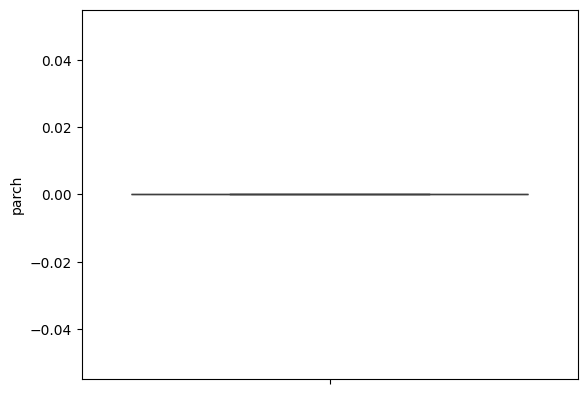

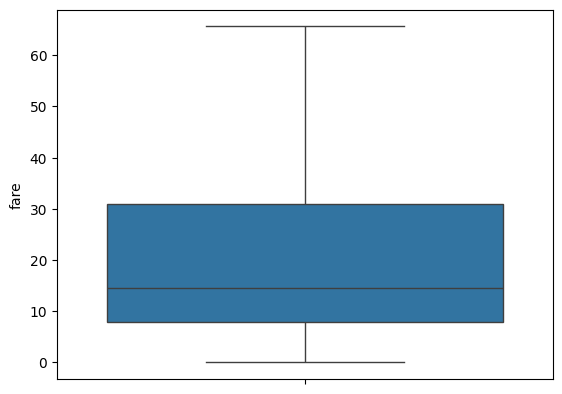

In [28]:
# check with boxplot
for i in ['age', 'sibsp', 'parch', 'fare']:
    sns.boxplot(df[i])
    plt.show()

### **Step 8: Treat duplicates & garbage values**

In [29]:
df =df.drop_duplicates()

### **Step8: Encoding of  Data**

In [30]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1.0,0.0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1.0,0.0,65.6344,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1.0,0.0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0.0,0.0,8.0500,S,Third,man,True,Southampton,no,True


In [32]:
# Do label encoding and one-hot encoding with pd.get_dummies
df = pd.get_dummies(data = df, columns=['sex','embarked','who','class','embark_town','alive'],drop_first=True)

In [33]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1.0,0.0,7.2500,True,False,True,False,True,True,False,False,True,False,True,False
1,1,1,38.0,1.0,0.0,65.6344,False,False,False,False,False,False,True,False,False,False,False,True
2,1,3,26.0,0.0,0.0,7.9250,False,True,False,False,True,False,True,False,True,False,True,True
3,1,1,35.0,1.0,0.0,53.1000,False,False,False,False,True,False,True,False,False,False,True,True
4,0,3,35.0,0.0,0.0,8.0500,True,True,True,False,True,True,False,False,True,False,True,False


## **Step 9: Model Training and Evaluation**

In [36]:
# split features and target
X = df.drop('survived', axis=1)  # features
y = df['survived']              # target (label)

In [37]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train a Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Make Predictions and Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        66

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

Confusion Matrix:
 [[87  0]
 [ 0 66]]


In [42]:
# Predict for a New Passenger
new_passenger = X.iloc[[0]]  # pick first row as an example
print("Predicted Survived (0=No, 1=Yes):", model.predict(new_passenger))

Predicted Survived (0=No, 1=Yes): [0]
